# Задание 1

Для разделения датасета на тренировочную и тестовую выборку необходимо запустить файл spam_split_data.sh  
Для получения файлов c результатами кросс-валидации и теста необходимо запустить  необходимо запустить spam_train.py

In [1]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import os

%matplotlib inline

In [2]:
with open(os.path.join('results', 'spam', 'cv_results_spam.json'), 'r') as f:
    data = json.load(f)

In [3]:
cv_dfs = [pd.DataFrame(d['res']) for d in data]

In [4]:
def plot_df(df):
    plt.errorbar(df['c'], df['err'], df['std'], linestyle='None', marker='o')
    plt.xscale('log')
    plt.show()

Зависимость ошибки от C при d = 1

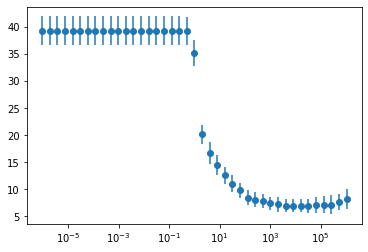

In [5]:
plot_df(cv_dfs[0])

Зависимость ошибки от C при d = 2

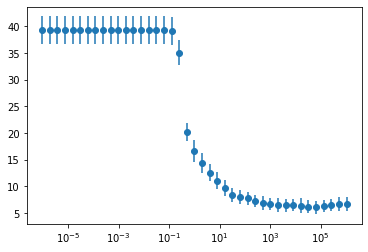

In [6]:
plot_df(cv_dfs[1])

Зависимость ошибки от C при d = 3

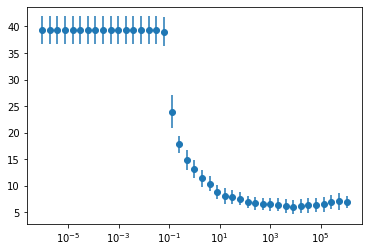

In [7]:
plot_df(cv_dfs[2])

Зависимость ошибки от C при d = 4

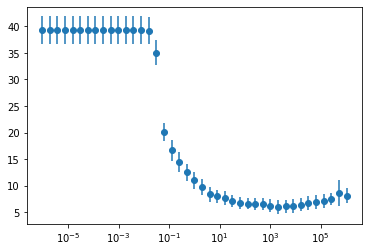

In [8]:
plot_df(cv_dfs[3])

In [9]:
with open(os.path.join('results', 'spam', 'test_results_spam.json'), 'r') as f:
    test_data = json.load(f)
test_df = pd.DataFrame(test_data)
best_c = test_df['c'][0]

In [10]:
d_values = []
err_values = []
min_err = 100
best_d = -1
for i, df in enumerate(cv_dfs):
    d_ = df[df['c'] == best_c]
    err = d_['err'].values[0]
    err_values.append(err)
    if err < min_err:
        min_err = err
        best_d = i+1
    d_values.append(i+1)
    
print('Cross-validation: best C: {}, best d: {}, min error: {}'.format(best_c, best_d, min_err))

Cross-validation: best C: 8192, best d: 3, min error: 5.942028985507247


Зависимость ошибки от d для кроссвалидации для лучшего значения C

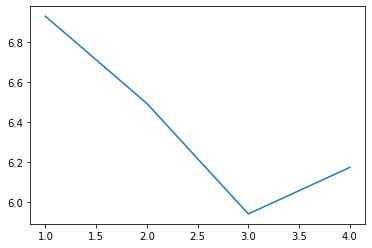

In [11]:
plt.plot(d_values, err_values)

Зависимость ошибки от d для теста

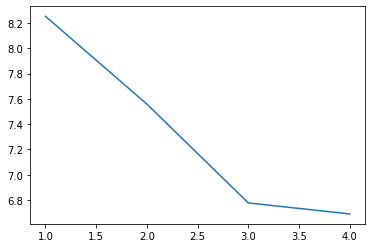

In [12]:
plt.plot(test_df['d'], test_df['err'])

Зависимость количества собственных векторов от d для теста

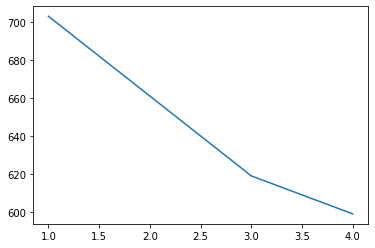

In [13]:
plt.plot(test_df['d'], test_df['n_sv'])

In [14]:
print('Number of support vectors for best_d from CV: {}'.format(test_df[test_df['d'] == best_d]['n_sv'].values[0]))

Number of support vectors for best_d from CV: 619


Таким образом, в лучшем по кросс-валидации решении используется 619 объектов в качестве опорных векторов, что составляет примерно 20% выборки.

# Задание 2

Для получения файлов c результатами кросс-валидации и теста необходимо запустить gisette_train.py

Исходные данные содержат тренировочную, валидационную и тестовую выборки. Так как тестовая выборка не содержит разметки, то использовать ее в дальнейшем не представляется возможным, так что ее роль будет выполнять валидационная.

Тренировочная выборка содержит 5000 признаков для 6000 объектов, тестовая - 1000 объектов.   


Попробуем натренироваться на всех признаках, используя d = 1, чтобы получить линейный классификатор

In [15]:
def results_eval(cv_res_path, test_res_path):
    with open(cv_res_path, 'r') as f:
        cv_data = json.load(f)

    with open(test_res_path, 'r') as f:
        test_data = json.load(f)
    cv_df = pd.DataFrame(cv_data[0]['res'])
    plot_df(cv_df)
    min_idx = cv_df['err'].idxmin()
    print('Min cross-validation error: {:f} +- {:f} for C={}'.format(cv_df['err'][min_idx], cv_df['std'][min_idx], cv_df['c'][min_idx]))
    print('Test error: {}'.format(test_data[0]['err']))

Зависимость значения ошибки на 5-fold кросс-валидации от C

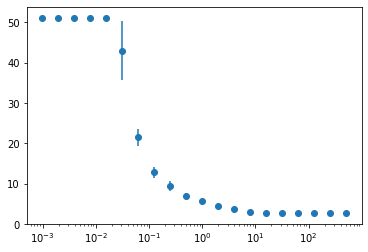

Min cross-validation error: 2.750000 +- 0.302765 for C=32.0
Test error: 2.4000000000000057


In [16]:
results_eval(os.path.join('results', 'gisette', 'cv_results_gisette_no_pca_lin.json'),\
             os.path.join('results', 'gisette', 'test_results_gisette_no_pca_lin.json'))

Таким образом, ошибка на тестовой выборке составляет 2.4%, при этом тренировка заняла около 2 часов.

Для уменьшения размерности попробуем использовать реализацию метода главных компонент из библиотеки Scikit-learn.  
Количество компонент определилось эмпирически и равно 50

Для выбора гиперпараметра C будем использовать 5-fold кросс-валидацию, d = 3 было выбрано серией предварительных экспериментов и зафиксировано.

Зависимость значения ошибки на кросс-валидации от C

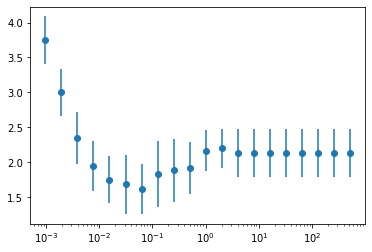

Min cross-validation error: 1.616667 +- 0.355903 for C=0.0625
Test error: 1.7999999999999972


In [17]:
results_eval(os.path.join('results', 'gisette', 'cv_results_gisette_pca_50.json'),\
             os.path.join('results', 'gisette', 'test_results_gisette_pca_50.json'))

Таким образом, минимальная ошибка 1.8% получена путем обучения SVM с C=0.0625, d=3 на данных, размерность которых была уменьшена методом главных компонент с количеством компонент 50